In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as da
import matplotlib as mtplt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime


In [30]:
ticker=['INFY.NS']
data = pd.DataFrame()
data = da.DataReader(ticker, data_source = 'yahoo' , start='2020-7-1')['Adj Close']

In [31]:
data.head

<bound method NDFrame.head of Symbols         INFY.NS
Date                   
2020-07-01   716.390503
2020-07-02   740.567078
2020-07-03   746.537842
2020-07-06   747.810242
2020-07-07   777.321411
...                 ...
2021-09-03  1700.650024
2021-09-06  1730.400024
2021-09-07  1706.650024
2021-09-08  1693.250000
2021-09-09  1691.599976

[299 rows x 1 columns]>

In [32]:
data.head
data.dropna()

Symbols,INFY.NS
Date,
2020-07-01,716.390503
2020-07-02,740.567078
2020-07-03,746.537842
2020-07-06,747.810242
2020-07-07,777.321411
...,...
2021-09-03,1700.650024
2021-09-06,1730.400024
2021-09-07,1706.650024


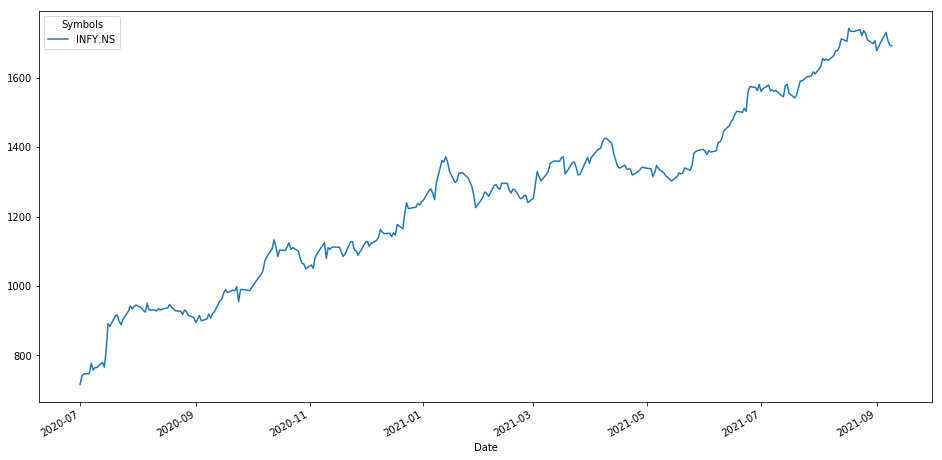

In [33]:
data.plot(figsize=(16,8))

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
#to Comment on stationarity of graph we need to perform ADFULLER test
#creating a function which runs ADFUller test on dataset
#adfuller test will return array of different values: ADF,p-value, number of lags etc
def ADF(dataset):
    ADFtest= adfuller(dataset, autolag='AIC')
    print("ADF value",ADFtest[0])
    print("p value",ADFtest[1])
    print("number of lags", ADFtest[2])
    print("number of obesrvations", ADFtest[3])
    
#p-value is most important...the less the value themore graph is stationary: ideally it should beless than 0.05

In [36]:
ADF(data)

ADF value -1.2177296466932022
p value 0.6659227451283494
number of lags 0
number of obesrvations 298


In [37]:
data= np.log(data)

In [38]:
from pmdarima import auto_arima

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
x=len(data)
x=x-15
train=data[:x]
test=data[x:]
x

284

In [41]:
findbest= auto_arima(train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1540.154, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1546.647, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1544.764, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1544.773, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1537.572, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1543.921, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.398 seconds


In [42]:
findbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 775.324
Date:                Sun, 12 Sep 2021   AIC                          -1546.647
Time:                        09:36:08   BIC                          -1539.357
Sample:                             0   HQIC                         -1543.724
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.001      3.140      0.002       0.001       0.005
sigma2         0.0002   1.29e-05     18.990      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               208.95
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
train.shape,test.shape

((284, 1), (15, 1))

In [57]:
model = ARIMA(train,order=(0,2,0))
model=model.fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.INFY.NS   No. Observations:                  282
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 678.247
Method:                           css   S.D. of innovations              0.022
Date:                Sun, 12 Sep 2021   AIC                          -1352.495
Time:                        09:37:13   BIC                          -1345.211
Sample:                             2   HQIC                         -1349.574
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.103      0.918      -0.003       0.002
==============================================================================
"""

In [59]:
pred=model.predict(start=len(train),end=(len(train)+len(test)-1),typ='levels')

In [60]:
pred.index=test.index

In [61]:
pred

Date
2021-08-20    7.453015
2021-08-23    7.448027
2021-08-24    7.442904
2021-08-25    7.437647
2021-08-26    7.432256
2021-08-27    7.426730
2021-08-30    7.421069
2021-08-31    7.415275
2021-09-01    7.409345
2021-09-02    7.403282
2021-09-03    7.397084
2021-09-06    7.390751
2021-09-07    7.384284
2021-09-08    7.377683
2021-09-09    7.370947
dtype: float64

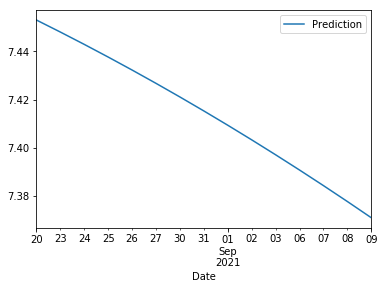

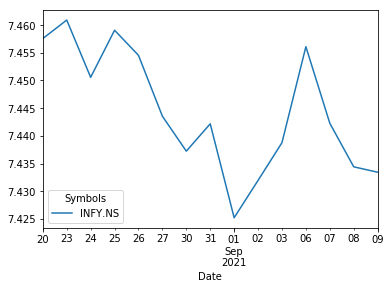

In [62]:
pred.plot(legend=True,label='Prediction')
test.plot(legend=True,label='Actual Price')

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [28]:
rmse=sqrt(mean_squared_error(pred,test))


In [29]:
rmse

0.036595034210266074